In [10]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt


plt.style.use('ggplot')
plt.rc('figure', figsize=(15, 6))

In [17]:
def u_0(x):
    return np.sin(np.pi * x)

def eigen_func(i, x):
    return np.sin(np.pi * i * x)

def l_i(b_0, i, x):
    return np.sin(np.pi * i * x) * (x <= b_0)

In [ ]:
class l_total:
    def __init__(self, b_0, C, i_0):
        self.i_0 = i_0
        self.b_0 = b_0
        self.C = C
    
    def __call__(self, x):
        res = 0
        for i in range(1, self.i_0):
            res = res + self.C[i] * l_i(self.b_0, i, x)
        return res


In [12]:
i_0 = 2
C = np.zeros(i_0)
a = 0
b = 1
b_0 = 0.5

A = np.zeros([i_0, i_0])
right = np.zeros(i_0)
integration_err_max = 0
for i in range(i_0):
    for j in range(i_0):
        integral, err = quad(lambda x: eigen_func(i + 1, x) * l_i(b_0, j + 1, x), a, b)
        A[i, j] = integral
        if err > integration_err_max:
            integration_err_max = err
    integral, err = quad(lambda x: eigen_func(i + 1, x) * u_0(x), a, b)
    right[i] = -integral

print(A)
print(right)

[[0.25       0.21220659]
 [0.21220659 0.25      ]]
[-5.00000000e-01 -6.65296846e-18]


In [13]:
C = np.linalg.solve(A, right)
C

array([-7.15579366,  6.07402631])

In [14]:
l = l_total(b_0, C, i_0)
adding_norm, err = quad(lambda x: l(x) ** 2, a, b)
print(np.sqrt(adding_norm))

3.037013154974482


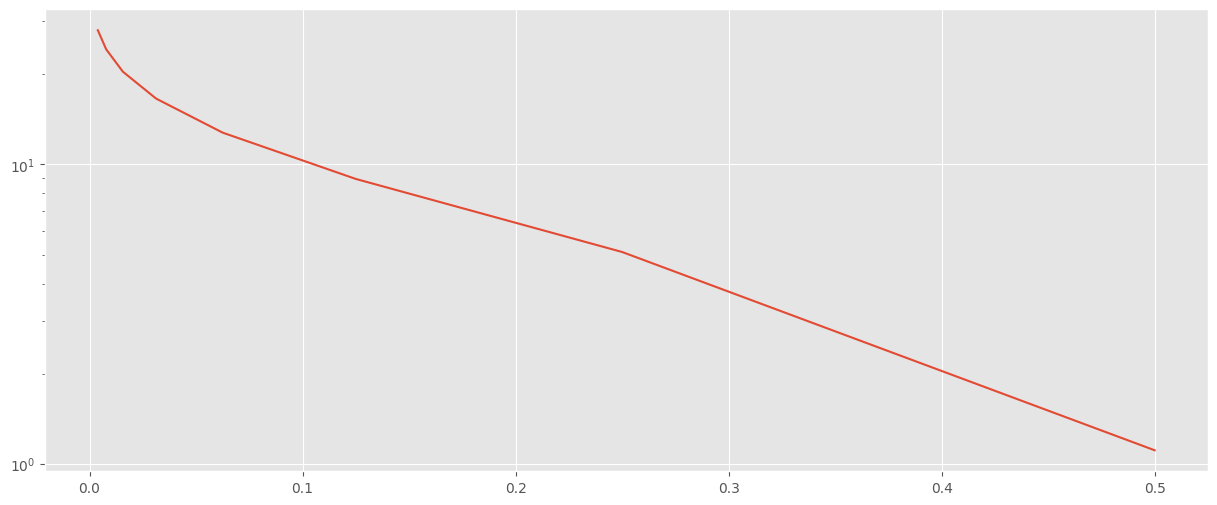

In [16]:
norms = []
b_0 = 1
for k in range(1, 9):
    # print(k)
    b_0 = b_0 / 2
    A = np.zeros([i_0, i_0])
    right = np.zeros(i_0)
    integration_err_max = 0
    for i in range(i_0):
        for j in range(i_0):
            integral, err = quad(lambda x: eigen_func(i + 1, x) * l_i(b_0, j + 1, x), a, b)
            A[i, j] = integral
            if err > integration_err_max:
                integration_err_max = err
        integral, err = quad(lambda x: eigen_func(i + 1, x) * u_0(x), a, b)
        right[i] = -integral
    C = np.linalg.solve(A, right)
    l = l_total(b_0, C, i_0)
    adding_norm, err = quad(lambda x: l(x) ** 2, a, b_0)
    norms.append(np.sqrt(adding_norm))

grid = [1 / (2 ** i) for i in range(1, 9)]
plt.plot(grid, np.log(np.array(norms)))
# plt.xscale('log')
plt.yscale('log')